# Summary

Explore how anisotropy $\psi$ varies with gradient exponent $\eta$ and ray angle $\alpha$.

In [1]:
# Specify the parameter files for the job
import os

if 'GME_NB_PR' not in os.environ.keys():
    pr_filenames = ['Derivation_sinbeta_eta0p5_ratio0p5']
else:
    pr_filenames = eval(os.environ['GME_NB_PR'])

### Logging

In [2]:
from importlib import reload
import logging, sys
reload(logging)
logging.basicConfig(level=logging.INFO, format=f'%(message)s')

### Preliminaries

In [3]:
# Import Numpy
import numpy as np

# Import SymPy and set up latex inline & pretty dict printing
from sympy import init_printing, Eq, Matrix, Rational

# Set up latex inline printing
init_printing(pretty_print=True,wrap_line=True)

# Pretty dict printing etc
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4).pprint
# from datetime import datetime

# # Import Geomorphysics library functions, classes
from gmplib.save import create_directories, export_plots
from gmplib.parameters import import_parameters, Parameters

# Import GME classes and do a wildcard (!) import of all GME symbol definitions
from gme.core.equations import Equations
from gme.plot.ray_angles import RayAngles

# Decide where we're working and thus where to find the job parameter files
#   -  use the GME_WORKING_PATH environment variable if it's defined
#   -  otherwise, deduce that we're working in the GME notebook dir
if 'GME_WORKING_PATH' in os.environ.keys():
    working_path = os.environ['GME_WORKING_PATH']
    print(f'Fetching working path from environment variable GME_WORKING_PATH = {working_path}')
else:
    from gmplib.utils import get_pkg_path
    import gme
    working_path = get_pkg_path(gme)
    print(f'Deducing working path from GME package location = {working_path}')
    del gme
    
# Set the path to the parameter files for this nb and report
pr_path = os.path.join(working_path,'Parameters','Theory')
pr_path, pr_filenames

Deducing working path from GME package location = /Users/colinstark/Projects/GME


('/Users/colinstark/Projects/GME/Parameters/Theory',
 ['Derivation_sinbeta_eta0p5_ratio0p5'])

In [4]:
# Read and combine the default and job parameter files, and report
parameters_dict,_ = import_parameters([pr_path], 
                                      [os.path.join('..','defaults')])
pr = Parameters(parameters_dict, evaluations={}, sequence=())
[pp(psubobj.__dict__) for psubobj in (pr.job, pr.model, pr.solve, 
                                        pr.resolve, pr.plot, pr.save)];

{   'debug': False,
    'group_name': 'Theory',
    'short_name': 'unnamed',
    'subtitle': '',
    'title': 'Unset',
    'verbose': True,
    'very_verbose': False}
{   'Ci': pi/45,
    'Lc': 10000,
    'beta_type': 'sin',
    'do_geodesic': False,
    'eta': 1/2,
    'h_0': 1/2,
    'ibc_type': 'concave-up',
    'kappa_h': 3/2,
    'mu': 1/4,
    't_xiv0_list': None,
    'varepsilonhat': 1/100,
    'varphi_0': 2.641e-05,
    'varphi_type': 'ramp',
    'x_h': 1,
    'x_sigma': 0.01,
    'xiv_0': None}
{   'choice': 'Hamilton',
    'do_dense': True,
    'do_geodesic': True,
    'do_ic': False,
    'do_ip': False,
    'do_vb': False,
    'ic_res': 31,
    'ip_res': 101,
    'method': {   'Hamilton': 'DOP853',
                  'choices': ['RK45', 'RK23', 'Radau', 'DOP853', 'LSODA'],
                  'geodesic': 'LSODA'},
    'ray_n_t': 301,
    't_distribn': 2,
    't_end': 0.01,
    'vb_res': 101}
{   'do_eliminate_caustics': True,
    'n_isochrones': 30,
    'spline_order': 3,
    '

# Basics

In [5]:
gmeq = Equations(eta_=pr.model.eta, 
                  mu_=pr.model.mu,
                  beta_type=pr.model.beta_type, 
                  varphi_type=pr.model.varphi_type, 
                  do_raw=True)

core.equations.Equations
core.equations.EquationsMixedIn
core.equations.EquationsBase
core.rp.define_p_eqns
core.rp.define_r_eqns
core.xi.define_xi_eqns
core.xi.define_xi_model_eqn
core.xi.define_xi_related_eqns
core.varphi.define_varphi_model_eqns
core.varphi.define_varphi_related_eqns
core.fundamental.define_Fstar_eqns
core.fundamental.define_H_eqns
core.hamiltons.define_rdot_eqns
core.hamiltons.define_pdot_eqns
core.hamiltons.define_Hamiltons_eqns
core.ndim.nondimensionalize
core.ndim.define_nodimensionalized_Hamiltons_eqns
core.angles.define_tanalpha_eqns
core.angles.define_tanbeta_eqns
core.angles.define_psi_eqns
core.metrictensor.define_g_eqns
core.pxpoly.define_px_poly_eqn (ndim=False)
core.pxpoly.define_px_poly_eqn (ndim=True)


# Anisotropy

In [6]:
gr = RayAngles()

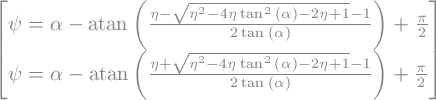

In [7]:
Matrix(gmeq.psi_alpha_eta_eqns)

Creating plot: psi_eta_alpha size=(8, 4) @ 100 dpi


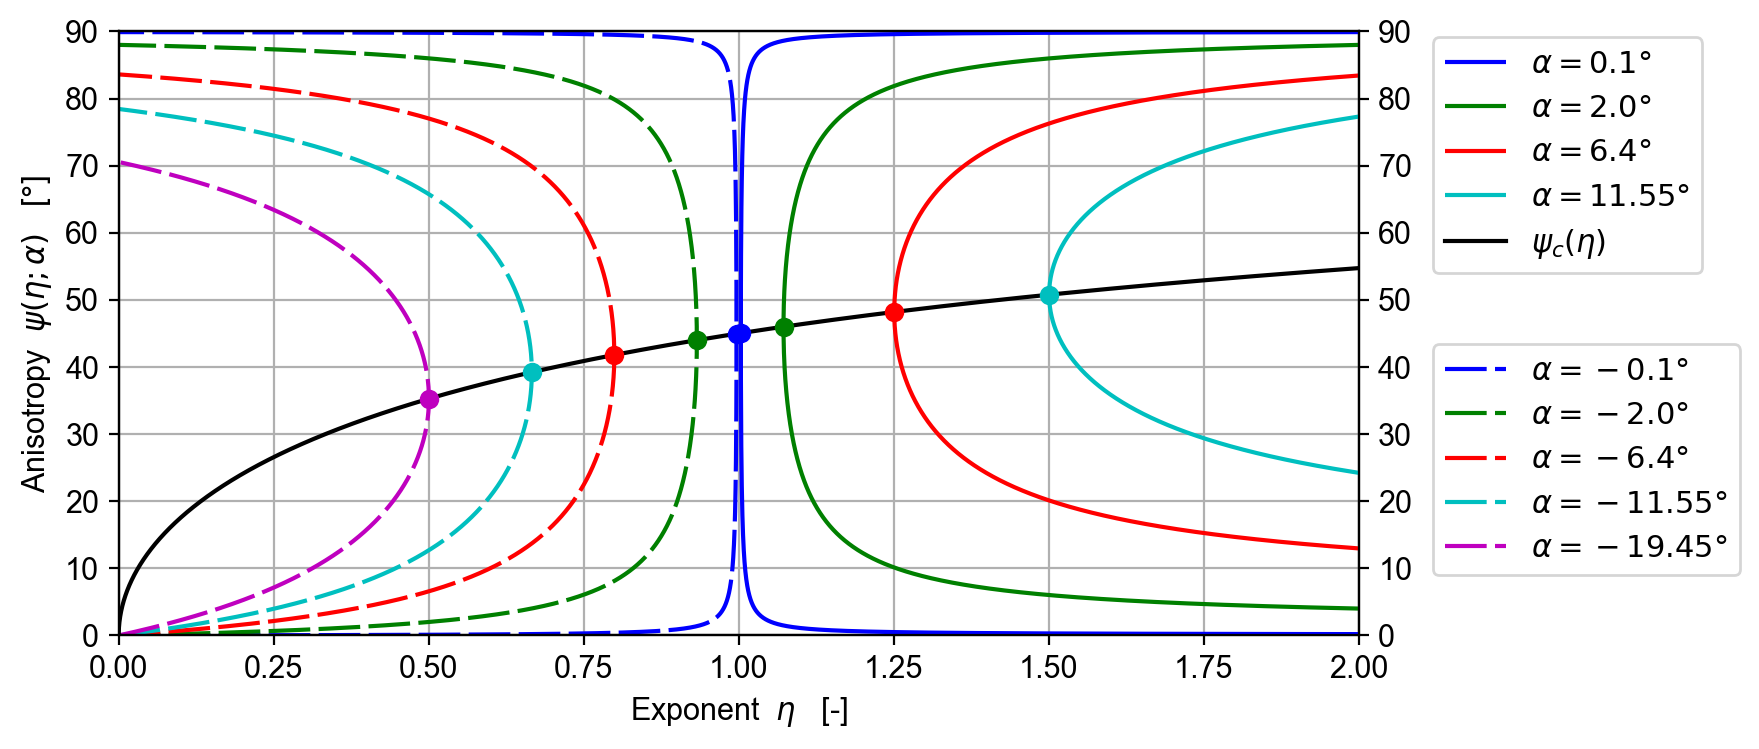

In [16]:
gr.psi_eta_alpha(gmeq, 'psi_eta_alpha')

# Save

Export the graphs as PNG/JPEG and/or PDF image files.

In [17]:
plots_dir = create_directories(pr.save.figs_path, pr.job.group_name)
export_plots( gr.fdict, plots_dir, 
              file_types=pr.save.figs_format, 
              dpi=pr.save.figs_options['dpi'] )

Writing to dir: "/Users/colinstark/Projects/GME/Plots/Theory"
Exported "psi_eta_alpha.jpg"
Exported "psi_eta_alpha.pdf"
